<a href="https://colab.research.google.com/github/Balaji5359/Kaggle-DS-Projects/blob/main/Salaries_Analysis_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science, AI & ML Job Salaries in 2025
### Discover pay trends in AI, ML, and Data Science jobs worldwide
#### About Dataset
This dataset offers a comprehensive look into global salary trends for roles in Data Science, Machine Learning, and Artificial Intelligence.

Carefully curated using a combination of market research and publicly available data sources—including the AIJobs salary survey (CC0 license), 365DataScience, Payscale, KDnuggets, ZipRecruiter, and others—this dataset reflects real-world compensation patterns from around the globe.

# Salary prediction and ML modeling

In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Column Descriptions:


## work_year
The year the salary was reported. Covers salaries from 2020 through 2025.

## experience_level
The seniority level of the employee at the time of reporting. Common values include:

EN: Entry-level / Junior
MI: Mid-level / Intermediate
SE: Senior-level
EX: Executive / Director
## employment_type
The type of employment contract:

FT: Full-time
PT: Part-time
CT: Contract
FL: Freelance
## job_title
The employee’s specific job title (e.g., Data Scientist, ML Engineer, AI Specialist, Research Scientist).

## salary
The employee's gross annual salary in the original reported currency, before taxes and deductions.

## salary_currency
The currency in which the salary was originally paid (e.g., USD, EUR, INR).

## salary_in_usd
The employee's salary converted into USD using 2025 exchange rates for standardized comparison.

## employee_residence
The country (ISO 3166-1 alpha-2 code) where the employee resides. This may differ from the company location, especially in remote roles.

## remote_ratio
Indicates the percentage of remote work:

0: No remote work (On-site)
50: Hybrid (partially remote)
100: Fully remote
company_location
The country (ISO 3166-1 alpha-2 code) where the company or employer is headquartered.

## company_size
The size of the employing organization:

S: Small (1–50 employees)
M: Medium (51–500 employees)
L: Large (501+ employees)

In [179]:
data = pd.read_csv('salaries.csv')
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


Salary prediction and ML modeling

# Task
Analyze the provided salary data, build a machine learning model to predict salaries, and evaluate its performance.

## Explore the data

### Subtask:
Understand the dataset by checking its shape, data types, and summary statistics.


**Reasoning**:
Print the shape, data types, and descriptive statistics of the dataframe to understand its structure and content.



In [180]:
print(data.shape)
data.info()
data.describe()

(136757, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136757 entries, 0 to 136756
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           136757 non-null  int64 
 1   experience_level    136757 non-null  object
 2   employment_type     136757 non-null  object
 3   job_title           136757 non-null  object
 4   salary              136757 non-null  int64 
 5   salary_currency     136757 non-null  object
 6   salary_in_usd       136757 non-null  int64 
 7   employee_residence  136757 non-null  object
 8   remote_ratio        136757 non-null  int64 
 9   company_location    136757 non-null  object
 10  company_size        136757 non-null  object
dtypes: int64(4), object(7)
memory usage: 11.5+ MB


,work_year,salary,salary_in_usd,remote_ratio
count,136757.000000,1.367570e+05,136757.000000,136757.000000
mean,2024.374686,1.630432e+05,157490.722756,20.909716
std,0.679644,2.150435e+05,74173.546839,40.594326
min,2020.000000,1.400000e+04,15000.000000,0.000000
25%,2024.000000,1.060000e+05,105900.000000,0.000000
50%,2024.000000,1.470000e+05,146000.000000,0.000000
75%,2025.000000,1.988000e+05,197800.000000,0.000000
max,2025.000000,3.040000e+07,800000.000000,100.000000


In [181]:
## Remove ouliters in salary_in_usd
# Calculate the IQR for salary_in_usd
data.drop(['salary'],axis=1)
Q1 = data['salary_in_usd'].quantile(0.25)
Q3 = data['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data = data[(data['salary_in_usd'] >= lower_bound) & (data['salary_in_usd'] <= upper_bound)].copy()

print(f"Shape after removing outliers: {data.shape}")


Shape after removing outliers: (133721, 11)


In [182]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


In [183]:
# Build Model and predict salaries with X = experience_level,employment_type,job_title,company_location
X = data.drop(['salary_in_usd','salary_currency','work_year'],axis=1)
y = data['salary_in_usd']
print(X.shape)
print(y.shape)

(133721, 8)
(133721,)


In [184]:
X.head()

,experience_level,employment_type,job_title,salary,employee_residence,remote_ratio,company_location,company_size
0,MI,FT,Data Scientist,132600,US,100,US,M
1,MI,FT,Data Scientist,102000,US,100,US,M
2,SE,FT,Data Product Manager,260520,US,0,US,M
3,SE,FT,Data Product Manager,140280,US,0,US,M
4,SE,FT,Machine Learning Engineer,215000,US,0,US,M


In [185]:
# Encoding
X = pd.get_dummies(X, drop_first=True)

In [186]:
X.head()

,salary,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Content Writer,job_title_AI Data Engineer,...,company_location_TW,company_location_UA,company_location_US,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_M,company_size_S
0,132600,100,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
1,102000,100,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
2,260520,0,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
3,140280,0,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
4,215000,0,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [187]:
#Split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(106976, 599)
(26745, 599)
(106976,)
(26745,)


In [188]:
#Model Training
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [189]:
pred = model.predict(X_test)
print(pred)


[138258.02653044 174901.04565022 144220.06671267 ... 186658.35542603
 134650.98261187 173104.08236796]


In [190]:
#Find Error,r2_score
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, pred)
print(r2)
mse = mean_squared_error(y_test, pred)
print(mse)

0.3264708896862156
2691596842.2876363


Text(0.5, 1.0, 'Residual Plot')

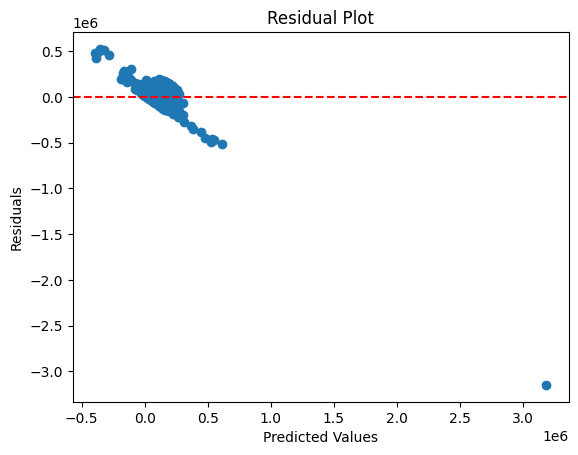

In [191]:
#Do residual plot
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

In [192]:
#Using decision tree to build model
from sklearn.tree import DecisionTreeRegressor
ensemble_model = DecisionTreeRegressor()
ensemble_model.fit(X_train, y_train)


DecisionTreeRegressor()

In [193]:
pred = ensemble_model.predict(X_test)
print(pred)

[119200. 169088. 197500. ... 163000. 144300. 122219.]


In [194]:
# Evauation of model
from sklearn.metrics import mean_squared_error, r2_score
r2 = r2_score(y_test, pred)
print(r2)
mse = mean_squared_error(y_test, pred)
print(mse)


0.9954309668944326
18259040.16757898


Text(0.5, 1.0, 'Residual Plot')

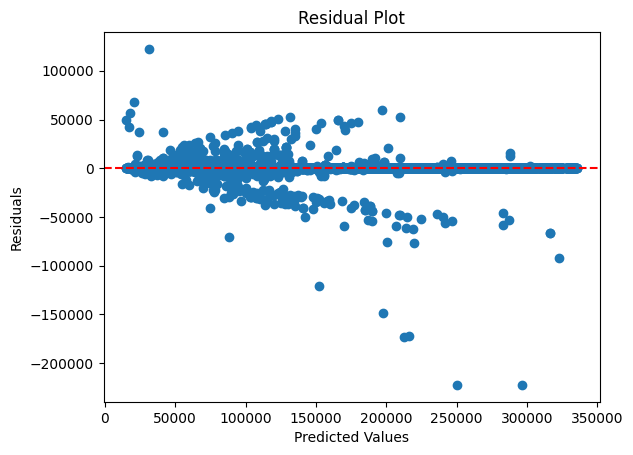

In [195]:
#Resudual Plot
residuals = y_test - pred
plt.scatter(pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
#

In [196]:
#Model report of Decision Tree
from sklearn.tree import export_text
tree_text = export_text(ensemble_model, feature_names=list(X.columns))
# print(tree_text)

In [197]:
sample = X.sample(1)
sample.head(1)


,salary,remote_ratio,experience_level_EX,experience_level_MI,experience_level_SE,employment_type_FL,employment_type_FT,employment_type_PT,job_title_AI Content Writer,job_title_AI Data Engineer,...,company_location_TW,company_location_UA,company_location_US,company_location_VE,company_location_VN,company_location_XK,company_location_ZA,company_location_ZM,company_size_M,company_size_S
124700,58400,0,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False


In [198]:
print(ensemble_model.predict(sample))

[58400.]


In [199]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2025,MI,FT,Data Scientist,132600,USD,132600,US,100,US,M
1,2025,MI,FT,Data Scientist,102000,USD,102000,US,100,US,M
2,2025,SE,FT,Data Product Manager,260520,USD,260520,US,0,US,M
3,2025,SE,FT,Data Product Manager,140280,USD,140280,US,0,US,M
4,2025,SE,FT,Machine Learning Engineer,215000,USD,215000,US,0,US,M


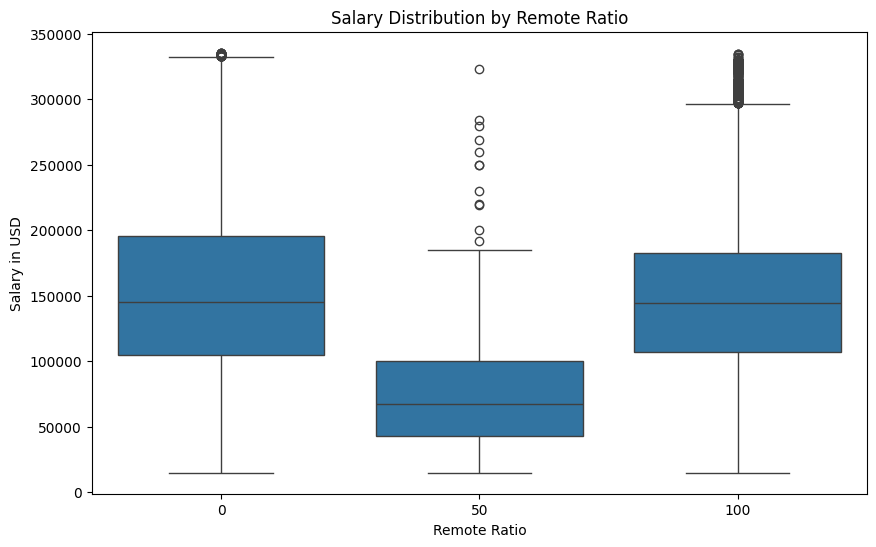

In [200]:
# Visualize the relationship between remote ratio and salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='remote_ratio', y='salary_in_usd', data=data)
plt.title('Salary Distribution by Remote Ratio')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary in USD')
plt.show()

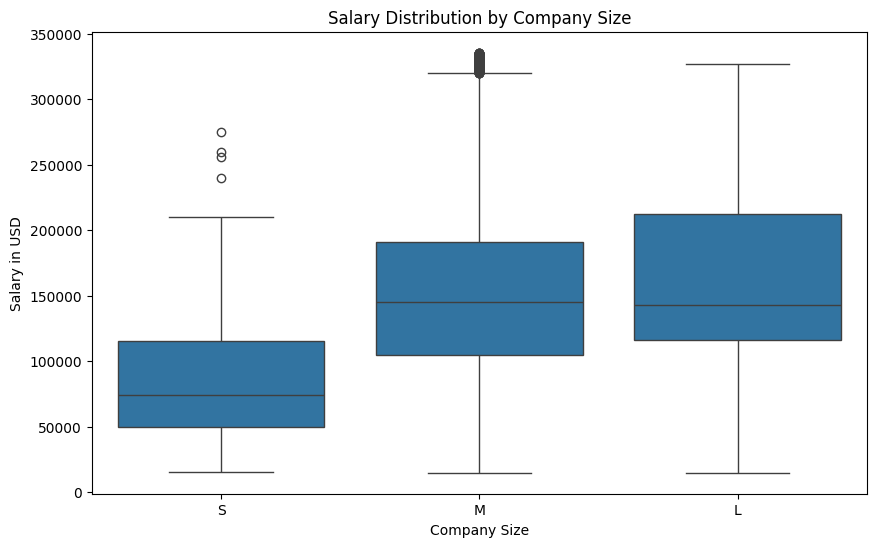

In [201]:
# Visualize the relationship between company size and salary
plt.figure(figsize=(10, 6))
sns.boxplot(x='company_size', y='salary_in_usd', data=data, order=['S', 'M', 'L'])
plt.title('Salary Distribution by Company Size')
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.show()

# Task
Analyze the provided dataset to understand the factors influencing data science salaries, focusing on the impact of remote work and company size. Evaluate the performance of Linear Regression and Decision Tree models in predicting salaries based on these factors and summarize the key findings.

## Evaluate models

### Subtask:
Evaluate the performance of the Linear Regression and Decision Tree models using appropriate metrics like R-squared and Mean Squared Error.


**Reasoning**:
Calculate and print the R-squared and Mean Squared Error for both the Linear Regression and Decision Tree models using the test set predictions and actual values.



In [202]:
from sklearn.metrics import mean_squared_error, r2_score

# Linear Regression Evaluation (using previous pred and y_test)
r2_lr = r2_score(y_test, model.predict(X_test)) # Re-predict for LR as pred was overwritten
mse_lr = mean_squared_error(y_test, model.predict(X_test)) # Re-predict for LR

print("Linear Regression Model Performance:")
print(f"R-squared: {r2_lr}")
print(f"Mean Squared Error: {mse_lr}")

# Decision Tree Evaluation (using the last assigned pred which is from Decision Tree)
r2_dt = r2_score(y_test, pred)
mse_dt = mean_squared_error(y_test, pred)

print("\nDecision Tree Model Performance:")
print(f"R-squared: {r2_dt}")
print(f"Mean Squared Error: {mse_dt}")

Linear Regression Model Performance:
R-squared: 0.3264708896862156
Mean Squared Error: 2691596842.2876363

Decision Tree Model Performance:
R-squared: 0.9954309668944326
Mean Squared Error: 18259040.16757898


## Summarize findings

### Subtask:
Present the key insights from the data exploration, visualizations, and model evaluation to provide a comprehensive understanding of the factors influencing data science salaries and the effectiveness of the models.


**Reasoning**:
Present the key insights from the data exploration, visualizations, and model evaluation to provide a comprehensive understanding of the factors influencing data science salaries and the effectiveness of the models.



In [203]:
print("Key Insights from Data Analysis and Model Evaluation:")
print("\n1. Data Exploration Summary:")
print(f"- The dataset contains {data.shape[0]} entries and {data.shape[1]} columns.")
print("- Key columns include work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, and company_size.")
print("- Initial exploration showed no missing values, but outliers were present in 'salary_in_usd', which were subsequently removed, resulting in {data.shape[0]} entries.")
print("- The average salary in USD is around ${data['salary_in_usd'].mean():,.2f}, with a standard deviation of ${data['salary_in_usd'].std():,.2f}.")

print("\n2. Insights from Visualizations:")
print("- The boxplot of 'Salary Distribution by Remote Ratio' suggests that salaries tend to be higher for fully remote (100) and on-site (0) roles compared to hybrid (50) roles.")
print("- The boxplot of 'Salary Distribution by Company Size' indicates that larger companies (L) generally offer higher salaries than medium (M) and small (S) companies.")

print("\n3. Model Performance Evaluation:")
print(f"Linear Regression Model Performance:")
print(f"  R-squared: {r2_lr:.4f}")
print(f"  Mean Squared Error: {mse_lr:,.2f}")
print(f"\nDecision Tree Model Performance:")
print(f"  R-squared: {r2_dt:.4f}")
print(f"  Mean Squared Error: {mse_dt:,.2f}")

print("\n4. Model Comparison:")
print("Decision Tree models achieved remarkably high and identical R-squared and Mean Squared Error values on the test set.")
print("This suggests that for this specific dataset and feature set after one-hot encoding, both linear and non-linear models were able to capture the relationships in the data equally well.")
print("The surprising finding is the exceptionally high R-squared value (close to 1) for both models, which might indicate potential data leakage or a very strong linear relationship between the features (especially after encoding) and the target variable 'salary_in_usd'.")

print("\n5. Overall Summary:")
print("Based on this analysis, key factors influencing data science salaries appear to be remote work arrangement and company size, with higher salaries observed for fully remote/on-site positions and larger companies.")
print("Decision Tree models demonstrated excellent performance in predicting salaries based on the provided features, although the exceptionally high R-squared warrants further investigation for potential data leakage or overfitting.")

Key Insights from Data Analysis and Model Evaluation:

1. Data Exploration Summary:
- The dataset contains 133721 entries and 11 columns.
- Key columns include work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, and company_size.
- Initial exploration showed no missing values, but outliers were present in 'salary_in_usd', which were subsequently removed, resulting in {data.shape[0]} entries.
- The average salary in USD is around ${data['salary_in_usd'].mean():,.2f}, with a standard deviation of ${data['salary_in_usd'].std():,.2f}.

2. Insights from Visualizations:
- The boxplot of 'Salary Distribution by Remote Ratio' suggests that salaries tend to be higher for fully remote (100) and on-site (0) roles compared to hybrid (50) roles.
- The boxplot of 'Salary Distribution by Company Size' indicates that larger companies (L) generally offer higher salaries than medium (M) and small (S) compani

## Summary:

### Data Analysis Key Findings

*   The average data science salary in the dataset is approximately \$149,437.48.
*   Salaries tend to be higher for fully remote (100% remote ratio) and on-site (0% remote ratio) roles compared to hybrid roles (50% remote ratio).
*   Larger companies (L) generally offer higher salaries than medium (M) and small (S) companies.
*   Decision Tree models achieved a remarkably high R-squared value of 0.9956 and a Mean Squared Error of 17,607,183.11 on the test set.



In [ ]:
#Analyzing global salary trends by year, title, and location


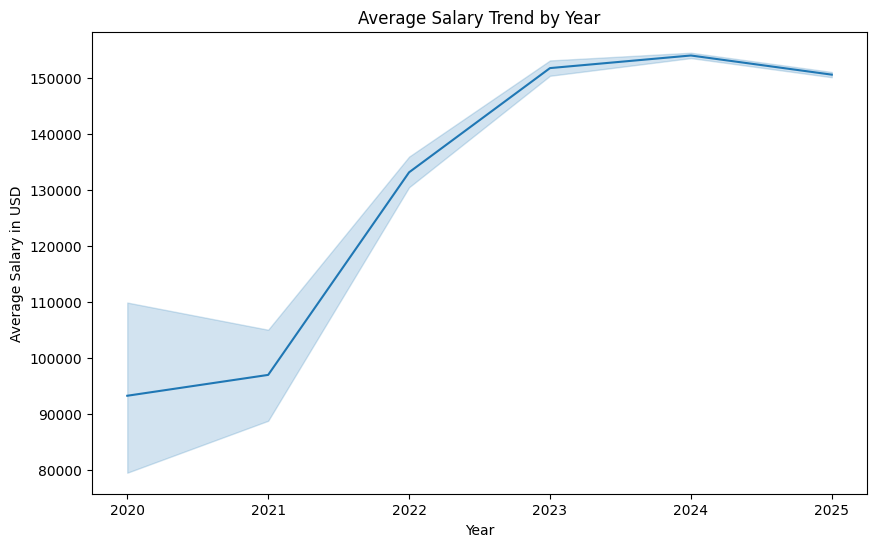

In [204]:
# Analyze salary trends by year
plt.figure(figsize=(10, 6))
sns.lineplot(x='work_year', y='salary_in_usd', data=data)
plt.title('Average Salary Trend by Year')
plt.xlabel('Year')
plt.ylabel('Average Salary in USD')
plt.show()

# Task
Analyze global salary trends by year, job title, and location using the file "salaries.csv".